<a href="https://colab.research.google.com/github/luidemendesrios/matrix_de_confusao/blob/main/matrix_de_confusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intalação do TensorFlow**

In [6]:
pip install -q tensorflow

# **Importações de bibliotecas que serão necessárias para o projeto**

In [7]:
from tensorflow.keras import datasets, layers, models # Importa módulos essenciais do Keras.
import matplotlib.pyplot as plt # Importa o módulo pyplot para visualização de dados.
import tensorflow as tf # Importa o TensorFlow completo para operações de aprendizado de máquina.

import numpy as np # Importa o NumPy para operações com arrays.

import seaborn as sns # Importa o Seaborn para gráficos estatísticos.

import pandas as pd # Importa o Pandas para manipulação de dados em DataFrames.

In [8]:
tf.__version__ # Verifica a versão do TensorFlow instalada.

'2.17.1'

In [10]:
!pip install tensorboard #instala o tensorboard

In [11]:
%load_ext tensorboard #Verifica se o TensorBoard está instalado corretamente

In [12]:
logdir='log' # Define o diretório para os logs do TensorBoard.

# **Carregamento e Preparação dos Dados**

In [13]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data() # Carrega o conjunto de dados MNIST.

# Reshape das imagens de treino e teste para serem usadas em redes neurais convolucionais (adiciona uma dimensão para a cor, que no caso do MNIST é escala de cinza).
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normaliza as imagens de treino e teste dividindo seus valores por 255.0, para que os valores dos pixels estejam entre 0 e 1.
train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9] # Define as classes do conjunto de dados MNIST (dígitos de 0 a 9).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Construção e Treinamento do Modelo**

In [14]:
model = models.Sequential() # Inicia a construção de um modelo sequencial.

# Adiciona camadas convolucionais e de pooling ao modelo
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adiciona camadas totalmente conectadas (densas) ao modelo.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1) # Configura o callback do TensorBoard para monitoramento do treinamento.

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # Compila o modelo com o otimizador Adam, função de perda e métricas de precisão.

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels)) # Treina o modelo usando os dados de treino e validação, com callbacks configurados.

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8989 - loss: 0.3340 - val_accuracy: 0.9855 - val_loss: 0.0472
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9872 - loss: 0.0435 - val_accuracy: 0.9888 - val_loss: 0.0357
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 36ms/step - accuracy: 0.9906 - loss: 0.0311 - val_accuracy: 0.9907 - val_loss: 0.0284
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.9917 - loss: 0.0250 - val_accuracy: 0.9902 - val_loss: 0.0283
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9911 - val_loss: 0.0266


In [19]:
# Armazena os rótulos verdadeiros para os dados de teste.
y_true = test_labels

# Usa o modelo para prever as probabilidades para cada classe nos dados de teste.
probabilities = model.predict(test_images)

# Converte as probabilidades em previsões de classe (índice da classe com maior probabilidade).
y_pred = np.argmax(probabilities, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [20]:
classes=[0,1,2,3,4,5,6,7,8,9]

# **Previsão e Matriz de Confusão**

Após o treinamento, o modelo é usado para fazer previsões, e a matriz de confusão é calculada e normalizada. A visualização e feita como heatmap

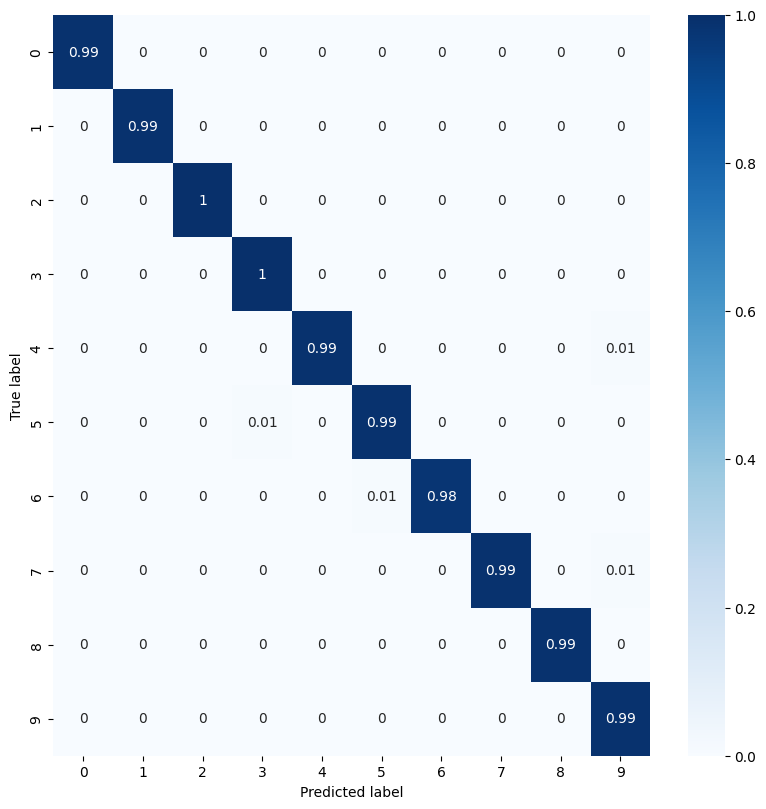

In [29]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy() # Plota a matriz de confusão como um heatmap usando Seaborn e Matplotlib.
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **Cálculo das Métricas**

Cálculo VP, VN, FP e FN para cada classe e imprime esses valores. Em seguida, foi definida uma função para calcular a acurácia, sensibilidade, especificidade, precisão e F-score

In [30]:
# Dicionário para armazenar os valores VP, VN, FP, FN para cada classe
metrics_por_classe = {}

# Número de classes
num_classes = len(classes)

for i in range(num_classes):
    # Calcula VP, FP, FN para a i-ésima classe
    metrics_por_classe[i] = {
        'vp': con_mat[i, i],
        'fp': con_mat[:, i].sum() - con_mat[i, i],
        'fn': con_mat[i, :].sum() - con_mat[i, i],
        'vn': con_mat.sum() - (con_mat[i, :].sum() + con_mat[:, i].sum() - con_mat[i, i])
    }

# Agora você tem os valores VP, VN, FP, FN para cada classe armazenados no dicionário metrics_por_classe

In [31]:
# Imprime os valores para todas as classes
for classe, metrics in metrics_por_classe.items():
    print(f"Valores para a classe {classe}:")
    print(f"Verdadeiros Positivos (VP): {metrics['vp']}")
    print(f"Falsos Positivos (FP): {metrics['fp']}")
    print(f"Falsos Negativos (FN): {metrics['fn']}")
    print(f"Verdadeiros Negativos (VN): {metrics['vn']}")
    print()  # Pula uma linha para melhorar a legibilidade da saída

Valores para a classe 0:
Verdadeiros Positivos (VP): 975
Falsos Positivos (FP): 6
Falsos Negativos (FN): 5
Verdadeiros Negativos (VN): 9014

Valores para a classe 1:
Verdadeiros Positivos (VP): 1127
Falsos Positivos (FP): 6
Falsos Negativos (FN): 8
Verdadeiros Negativos (VN): 8859

Valores para a classe 2:
Verdadeiros Positivos (VP): 1028
Falsos Positivos (FP): 9
Falsos Negativos (FN): 4
Verdadeiros Negativos (VN): 8959

Valores para a classe 3:
Verdadeiros Positivos (VP): 1005
Falsos Positivos (FP): 15
Falsos Negativos (FN): 5
Verdadeiros Negativos (VN): 8975

Valores para a classe 4:
Verdadeiros Positivos (VP): 975
Falsos Positivos (FP): 5
Falsos Negativos (FN): 7
Verdadeiros Negativos (VN): 9013

Valores para a classe 5:
Verdadeiros Positivos (VP): 884
Falsos Positivos (FP): 19
Falsos Negativos (FN): 8
Verdadeiros Negativos (VN): 9089

Valores para a classe 6:
Verdadeiros Positivos (VP): 940
Falsos Positivos (FP): 5
Falsos Negativos (FN): 18
Verdadeiros Negativos (VN): 9037

Valores

In [32]:
# Suponha que 'con_mat' já foi calculado anteriormente e que 'classes' contém todas as classes

# Calcula as métricas para cada classe
def calcular_metricas(con_mat, classe):
    vp = con_mat[classe, classe]
    fp = con_mat[:, classe].sum() - vp
    fn = con_mat[classe, :].sum() - vp
    # O cálculo de VN é uma aproximação em classificação multiclasse
    vn = con_mat.sum() - (con_mat[classe, :].sum() + con_mat[:, classe].sum() - vp)

    epsilon = 1e-7  # Para evitar divisão por zero.
    # Calculando as métricas
    acuracia = (vp + vn) / con_mat.sum()
    sensibilidade = vp / (vp + fn) if (vp + fn) != 0 else 0
    especificidade = vn / (fp + vn) if (fp + vn) != 0 else 0
    precisao = vp / (vp + fp) if (vp + fp) != 0 else 0
    f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) != 0 else 0

    return acuracia, sensibilidade, especificidade, precisao, f_score

# Imprime as métricas para cada classe
for classe in classes:
    acuracia, sensibilidade, especificidade, precisao, f_score = calcular_metricas(con_mat, classe)
    print(f"Métricas para a classe {classe}:")
    print(f"Acurácia: {acuracia:.2f}")
    print(f"Sensibilidade: {sensibilidade:.2f}")
    print(f"Especificidade: {especificidade:.2f}")
    print(f"Precisão: {precisao:.2f}")
    print(f"F-score: {f_score:.2f}")
    print()  # Pula uma linha para melhorar a legibilidade da saída

Métricas para a classe 0:
Acurácia: 1.00
Sensibilidade: 0.99
Especificidade: 1.00
Precisão: 0.99
F-score: 0.99

Métricas para a classe 1:
Acurácia: 1.00
Sensibilidade: 0.99
Especificidade: 1.00
Precisão: 0.99
F-score: 0.99

Métricas para a classe 2:
Acurácia: 1.00
Sensibilidade: 1.00
Especificidade: 1.00
Precisão: 0.99
F-score: 0.99

Métricas para a classe 3:
Acurácia: 1.00
Sensibilidade: 1.00
Especificidade: 1.00
Precisão: 0.99
F-score: 0.99

Métricas para a classe 4:
Acurácia: 1.00
Sensibilidade: 0.99
Especificidade: 1.00
Precisão: 0.99
F-score: 0.99

Métricas para a classe 5:
Acurácia: 1.00
Sensibilidade: 0.99
Especificidade: 1.00
Precisão: 0.98
F-score: 0.98

Métricas para a classe 6:
Acurácia: 1.00
Sensibilidade: 0.98
Especificidade: 1.00
Precisão: 0.99
F-score: 0.99

Métricas para a classe 7:
Acurácia: 1.00
Sensibilidade: 0.99
Especificidade: 1.00
Precisão: 0.99
F-score: 0.99

Métricas para a classe 8:
Acurácia: 1.00
Sensibilidade: 0.99
Especificidade: 1.00
Precisão: 1.00
F-score

# **Gráfico da curva ROC (Receiver Operating Characteristic) para um modelo de classificação multiclasse**

In [26]:
!pip install scikit-learn #instala a biblioteca sklearn

# **Cálculo e Plotagem da Curva ROC**

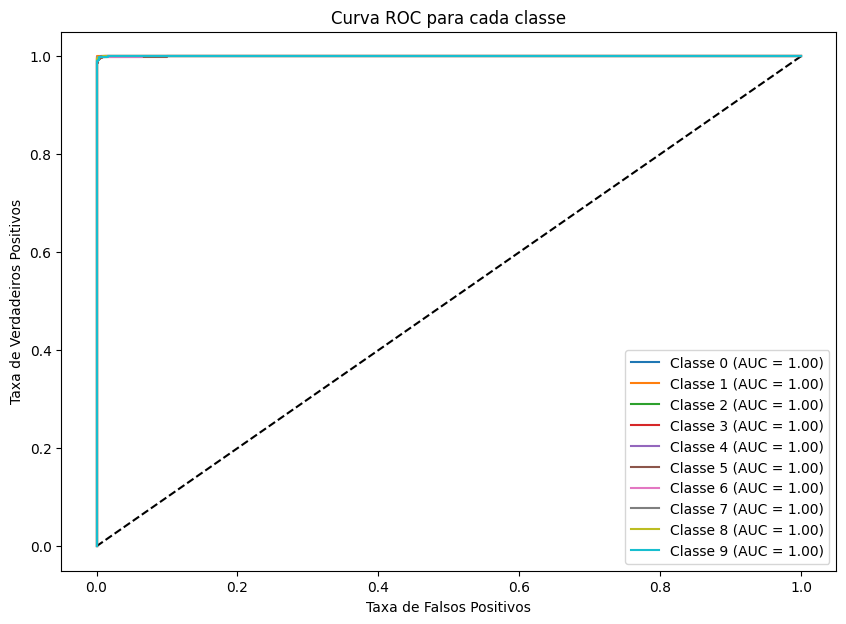

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Suponha que 'probabilities' contém as probabilidades previstas pelo modelo para cada classe e 'y_true' os rótulos verdadeiros

# One-hot encoding dos rótulos verdadeiros para uso na curva ROC
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=len(classes))

# Dicionário para armazenar as curvas ROC e os valores de AUC para cada classe
roc_curves = {}
auc_scores = {}

# Calcula a curva ROC e AUC para cada classe
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], probabilities[:, i])
    roc_curves[i] = (fpr, tpr)
    auc_scores[i] = auc(fpr, tpr)

# Plotando a curva ROC para cada classe
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
for i, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {auc_scores[i]:.2f})')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para cada classe')
plt.legend(loc='best')
plt.show()

**Observações Importantes:**

**Acurácia Global vs. Acurácia por Classe:** A função calcular_metricas calcula a acurácia global, e não a acurácia por classe. Para calcular a acurácia por classe, teria que ajustar a fórmula para considerar a contribuição proporcional de cada classe.

**Divisão por Zero:** Adicionei uma pequena constante epsilon para evitar divisões por zero nas métricas que envolvem divisão. Isso é uma prática comum para garantir que não ocorram erros de divisão.

